In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/mobiliar-im-bahnhof%40sbb/export/

In [2]:
df = pd.read_csv('./data/mobiliar-im-bahnhof_sbb.csv', delimiter=';').drop(columns=['BE', 'Didok number', 'lod', 'transport company', 'OPUIC'])
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7899 entries, 0 to 7919
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Designation  7899 non-null   object 
 1   FLAME2       7899 non-null   float64
 2   Unit         7899 non-null   object 
 3   Stop name    7899 non-null   object 
 4   Geopos       7899 non-null   object 
dtypes: float64(1), object(4)
memory usage: 370.3+ KB


In [4]:
df['Latitude'] = df['Geopos'].apply(lambda x: float(x.split(',')[0]))
df['Longitude'] = df['Geopos'].apply(lambda x: float(x.split(',')[1]))

In [5]:
df

,Designation,FLAME2,Unit,Stop name,Geopos,Latitude,Longitude
0,Sitzbank,4.0,Stck,Aarau,"47.3913595142, 8.0512737187",47.391360,8.051274
1,Billetentwerter,3.0,Stck,Aarau,"47.3913595142, 8.0512737187",47.391360,8.051274
2,Sitzbank,12.0,Stck,Aarau,"47.3913595142, 8.0512737187",47.391360,8.051274
3,Lift,2.0,Stck,Aarau,"47.3913595142, 8.0512737187",47.391360,8.051274
4,Recyclingstation Chromstahl,2.0,Stck,Aarau,"47.3913595142, 8.0512737187",47.391360,8.051274
...,...,...,...,...,...,...,...
7915,Toiletten Fierz Modul A,1.0,Stck,Wil SG,"47.4624132427, 9.04099305047",47.462413,9.040993
7916,Oeff. Toilette,17.0,m2,Wald ZH,"47.2726905046, 8.91399975334",47.272691,8.914000
7917,Toiletten Fierz Modul A,1.0,Stck,Winterthur Seen,"47.4874354194, 8.76681349078",47.487435,8.766813
7918,Toiletten Fierz Modul A,1.0,Stck,Zürich Altstetten,"47.3914830731, 8.48896264996",47.391483,8.488963


Questions
- What kind of items can you find at Swiss train stations?
- Map of stations that have / do not have a ticket vending machine
- Map of stations that have / do not have a public bathroom (associated with size?)

In [6]:
df['designation_en'] = df['Designation'].replace({'Sitzbank': 'bench',
                                                  'Billetentwerter': 'ticket validator',
                                                  'Billetautomat': 'ticket machine',
                                                  'Abfallkorb': 'wastebasket',
                                                  'Infopunkt': 'info point',
                                                  'Chrom-Abfallbehälter': 'chromium wastebasket',
                                                  'Stele': 'stele',
                                                  'Aschenbecher': 'ashtray',
                                                  'Infowand-RV05': 'monitor',
                                                  'Rail-Beam RV05': 'monitor',
                                                  'BildschirmMonitor': 'monitor',
                                                  'Aschenbecherstele': 'ashtray',
                                                  'Recyclingstation Chromstahl': 'chromium recycling station',
                                                  'Oeff. Toilette': 'public toilet',
                                                  'Toiletten Fierz Modul A': 'public toilet',
                                                  'Videoanlage': 'CCTV',
                                                  'Schliessfächer': 'lockers',
                                                  'Aut. Schiebetuer': 'automatic doors',
                                                  'Bildschirmstele': 'monitor',
                                                  'Desinfektionsmittel-Dispenser-Stele': 'disinfectant',
                                                  'Lift': 'elevator',
                                                  'Toiletten Fierz Modul B': 'public toilet',
                                                  'Toiletten Chromstahl': 'public toilet',
                                                  'Schliessfächer NSFA': 'lockers',
                                                  'infopunkt': 'info point',
                                                  'Toiletten Modell Stadelhofen': 'public toilet'
                                                 })

In [7]:
df.drop(columns=['FLAME2', 'Unit', 'Geopos']).head(14)

,Designation,Stop name,Latitude,Longitude,designation_en
0,Sitzbank,Aarau,47.391360,8.051274,bench
1,Billetentwerter,Aarau,47.391360,8.051274,ticket validator
2,Sitzbank,Aarau,47.391360,8.051274,bench
3,Lift,Aarau,47.391360,8.051274,elevator
4,Recyclingstation Chromstahl,Aarau,47.391360,8.051274,chromium recycling station
5,Sitzbank,Aarau,47.391360,8.051274,bench
6,Billetentwerter,Aathal,47.335959,8.765625,ticket validator
7,Infopunkt,Aathal,47.335959,8.765625,info point
8,Stele,Aathal,47.335959,8.765625,stele
9,Rail-Beam RV05,Aathal,47.335959,8.765625,monitor


In [8]:
plot1 = df['designation_en'].value_counts().reset_index().rename(columns={'index':'designation', 'designation_en':'count'})
plot1

,designation,count
0,bench,1281
1,ticket validator,888
2,ticket machine,841
3,wastebasket,833
4,info point,752
5,monitor,702
6,chromium wastebasket,679
7,ashtray,633
8,stele,538
9,public toilet,275


In [9]:
sns.set_style('whitegrid')
sns.set_context('notebook')

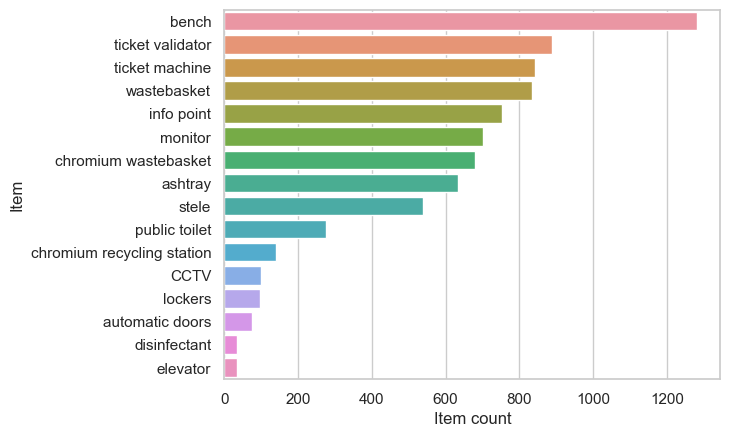

In [10]:
fig, ax = plt.subplots()
sns.barplot(data=plot1, x='count', y='designation')

ax.set_xlabel('Item count')
ax.set_ylabel('Item')

plt.savefig('./plots/2023-09-15_sbb_items.png', dpi=150, bbox_inches='tight')
plt.show()

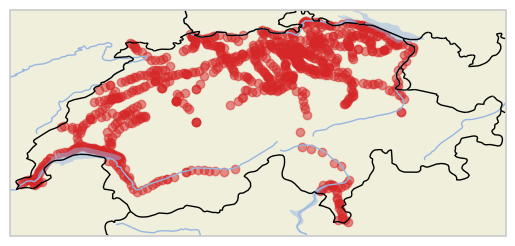

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([5.9, 10.5, 45.7, 47.8])

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)

ax.scatter(df.query('designation_en == "ticket machine"')['Longitude'].values, 
           df.query('designation_en == "ticket machine"')['Latitude'].values, 
           transform=ccrs.PlateCarree(),
           color='C3',
           alpha=0.5,
          )

plt.savefig('./plots/2023-09-15_sbb_ticket_map.png', dpi=150, bbox_inches='tight')
plt.show()

In [12]:
plot2 = df.groupby(['Stop name', 'Latitude', 'Longitude'])['designation_en'].count().reset_index()
plot2['designation_en'].describe(percentiles=[.1, .9])

count    801.000000
mean       9.861423
std        7.281107
min        1.000000
10%        4.000000
50%        8.000000
90%       17.000000
max       78.000000
Name: designation_en, dtype: float64

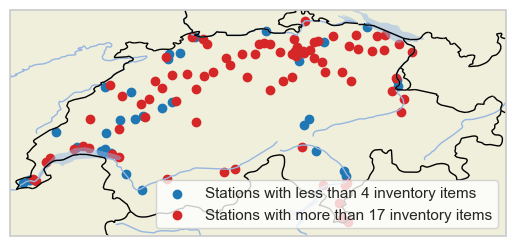

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([5.9, 10.5, 45.7, 47.8])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)

ax.scatter(plot2.query("designation_en <4")['Longitude'].values, 
           plot2.query("designation_en <4")['Latitude'].values, 
           #s=plot2.query("designation_en <4")['designation_en'].values*10,
           transform=ccrs.PlateCarree(),
           alpha=1, color='C0', label='Stations with less than 4 inventory items',
          )

ax.scatter(plot2.query("designation_en >=17")['Longitude'].values, 
           plot2.query("designation_en >=17")['Latitude'].values, 
           #s=plot2.query("designation_en >=17")['designation_en'].values*10,
           transform=ccrs.PlateCarree(),
           alpha=1, color='C3', label='Stations with more than 17 inventory items',
          )

ax.legend()

plt.savefig('./plots/2023-09-15_sbb_item_map.png', dpi=150, bbox_inches='tight')
plt.show()